# **EXERCISES**

# Exercise 01

Build a machine learning algorithm with the `Wines` dataset (predict Red or White wine) and using following feature selection methods:
- No feature selection
- Filter: Implement a `SelectKBest` method with `f_classif` as scoring function. Select the top 5 features.
- Wrapper: Implement a `RFE` method with a `LogisticRegression` as estimator. Select the top 5 features. NOTE: Use StandardScaler first.
- Intrinsic: Get the Top 5 features from a `DecisionTreeClassifier` model. NOTE: You can also use `SelectFromModel` with `DecisionTreeClassifier` as estimator.
- Use mRMR to select the top 5 features.

Then train a `RandomForestClassifier` with the selected features and evaluate the model using a 5-fold cross-validation.

In [1]:
import pandas as pd

c:\Users\dasir\anaconda3\envs\pda-ie\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("data/wine_dataset.csv")
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt


In [26]:
X = data.drop(['style'], axis=1)
y = data['style']

# apply train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


**Don't apply any dimensionality reduction technique**

In [31]:
# No feature selection - use original features
rf = LogisticRegression(max_iter=1000)
scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("No feature selection")
print("Features:", X_train_scaled.columns)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())

No feature selection
Features: Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Cross-validation scores: [0.99134615 0.99423077 0.99422522 0.99230029 0.99518768]
Average CV score: 0.9934580217664915


**1. Apply `SelectKBest` with `f_classif` (ANOVA)**

In [43]:
# Apply SelectKBest with f_classif to select top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_train_scaled, y_train)

# Transform to DataFrame
X_selected = pd.DataFrame(X_selected, columns=selector.get_feature_names_out())

# Train RandomForestClassifier and evaluate with 5-fold cross-validation
rf = LogisticRegression(max_iter=1000)
scores = cross_val_score(rf, X_selected, y_train, cv=5, scoring='accuracy')

print("Filter: SelectKBest with f_classif")
print("Selected features:", selector.get_feature_names_out())
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())

Filter: SelectKBest with f_classif
Selected features: ['fixed_acidity' 'volatile_acidity' 'chlorides' 'total_sulfur_dioxide'
 'sulphates']
Cross-validation scores: [0.98365385 0.98557692 0.98556304 0.97786333 0.97882579]
Average CV score: 0.9822965869549123


**Apply `RFE` with `LogisticRegression`**   


In [30]:
# Initialize LogisticRegression and RFE to select top 5 features
lr = LogisticRegression(random_state=42)
rfe = RFE(estimator=lr, n_features_to_select=5)

# Fit RFE
X_selected = rfe.fit_transform(X_train_scaled, y_train)

# Get selected feature names
selected_features = X_train.columns[rfe.support_]
X_selected = pd.DataFrame(X_selected, columns=selected_features)

# Train RandomForestClassifier and evaluate with 5-fold cross-validation
rf = LogisticRegression(max_iter=1000)
scores = cross_val_score(rf, X_selected, y_train, cv=5, scoring='accuracy')

print("Wrapper: RFE with LogisticRegression")
print("Selected features:", selected_features)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())

Wrapper: RFE with LogisticRegression
Selected features: Index(['volatile_acidity', 'residual_sugar', 'total_sulfur_dioxide', 'density',
       'alcohol'],
      dtype='object')
Cross-validation scores: [0.99326923 0.99519231 0.99615014 0.99230029 0.99422522]
Average CV score: 0.9942274376249353


**Apply a `DecisionTreeClassifier`**

In [42]:
# Initialize DecisionTreeClassifier and SelectFromModel
dt = DecisionTreeClassifier(random_state=42)

# Fit and transform the data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

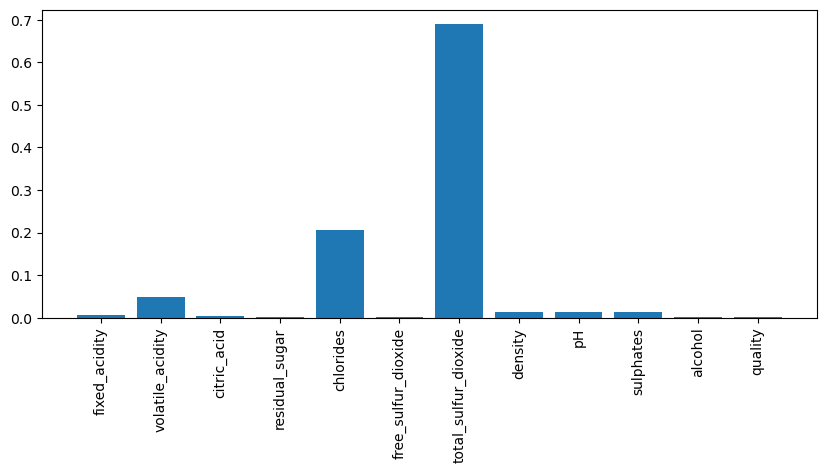

In [41]:
# plot feature importances
plt.figure(figsize=(10, 4))
plt.bar(X_train.columns, dt.feature_importances_)
plt.xticks(rotation=90)
plt.show()
    

In [45]:
# select top 5 features
selected_features = X_train.columns[dt.feature_importances_.argsort()[-5:]]
X_selected = X_train[selected_features]

# train and evaluate
rf = LogisticRegression(max_iter=1000)
scores = cross_val_score(rf, X_selected, y_train, cv=5, scoring='accuracy')

print("Embedded: DecisionTreeClassifier")
print("Selected features:", selected_features)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())


Embedded: DecisionTreeClassifier
Selected features: Index(['sulphates', 'pH', 'volatile_acidity', 'chlorides',
       'total_sulfur_dioxide'],
      dtype='object')
Cross-validation scores: [0.97692308 0.97692308 0.97401347 0.9653513  0.96920115]
Average CV score: 0.9724824165247649
